In [2]:
import importlib,sys,local_utils
from local_utils import *

# Discussion of the case $N=p^n$ with $p$ prime.

The Pascal triangle is well known for its fractal structure when one considers its entries modulo $p$, where $p$ is a prime number.

For instance, in "DES DÉCOUVERTES DANS LE TRIANGLE DE PASCAL", Gregor BERG, (https://mathinfo.unistra.fr/websites/math-info/irem/Publications/L_Ouvert/o_71_9-22.pdf), the positions of the triangles of zeros are discussed, and the associated fractal dimension is computed.

We discuss here the existence of a geometric recursive construction rule for the Pascal tiling with $N=p^n$ and $p$ prime, starting from the Tiling obtained for $N=p^{n-1}$.

## Geometric formulation for $S^{p^n}_{i,j} \mod p$

The example below shows the checkerboard modulo $p$, for $N=3$, $9$ and $27$.


N= 3


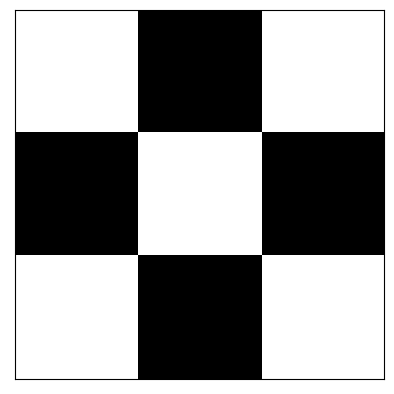

N= 9


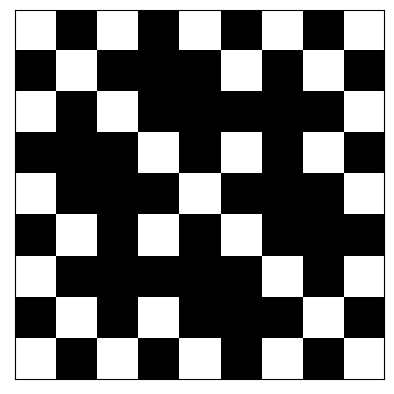

N= 27


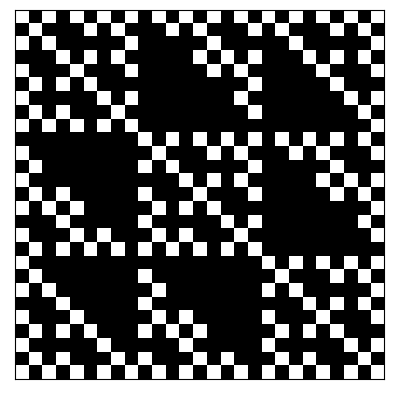

In [3]:
p=3
for n in [1,2,3]:
    N=p**n
    print("N=",N)
    S=damier_pascal_S(N)
    plt.figure()
    plt.imshow(((S%p)!=0).astype('int')*255,cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.xticks([])  
    plt.yticks([]) 
    plt.show()

One observes triangles of zeros in the Pascal tiling, as in the Pascal triangle.

In [4]:
p=3
for n in [3]:
    N=p**n
    print("S=A+B, N=",N)
    print("A")
    A=damier_pascal_A(N+1)
    Affiche(A%p)
    print("B")
    B=damier_pascal_B(N+1)
    Affiche(B%p)
        

S=A+B, N= 27
A
i= 0 |  1 
i= 1 |  1  1 
i= 2 |  1  2  1 
i= 3 |  1  0  0  1 
i= 4 |  1  1  0  1  1 
i= 5 |  1  2  1  1  2  1 
i= 6 |  1  0  0  2  0  0  1 
i= 7 |  1  1  0  2  2  0  1  1 
i= 8 |  1  2  1  2  1  2  1  2  1 
i= 9 |  1  0  0  0  0  0  0  0  0  1 
i=10 |  1  1  0  0  0  0  0  0  0  1  1 
i=11 |  1  2  1  0  0  0  0  0  0  1  2  1 
i=12 |  1  0  0  1  0  0  0  0  0  1  0  0  1 
i=13 |  1  1  0  1  1  0  0  0  0  1  1  0  1  1 
i=14 |  1  2  1  1  2  1  0  0  0  1  2  1  1  2  1 
i=15 |  1  0  0  2  0  0  1  0  0  1  0  0  2  0  0  1 
i=16 |  1  1  0  2  2  0  1  1  0  1  1  0  2  2  0  1  1 
i=17 |  1  2  1  2  1  2  1  2  1  1  2  1  2  1  2  1  2  1 
i=18 |  1  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  1 
i=19 |  1  1  0  0  0  0  0  0  0  2  2  0  0  0  0  0  0  0  1  1 
i=20 |  1  2  1  0  0  0  0  0  0  2  1  2  0  0  0  0  0  0  1  2  1 
i=21 |  1  0  0  1  0  0  0  0  0  2  0  0  2  0  0  0  0  0  1  0  0  1 
i=22 |  1  1  0  1  1  0  0  0  0  2  2  0  2  2  

One may observe that the large triangles of $0$ appearing in matrix $A$ are in fact also present in matrix $B$, due to the symmetry that maps $A$ to $B$ and leaves the triangles of $0$ invariant.

The observation of the Pascal tilings for small values of $p$ and $n$ makes it possible to identify a simple recursive construction rule for the tiling modulo $p$.

Instead of filling $D$ with $0$ and $1$ according to the remainder of the Euclidean division by $N$, we construct here a different matrix $D$, in which three cases are distinguished:
- $D^{N=p^n}_{i,j}=1$ when $S^{N=p^n}_{i,j}$ is a multiple of $p$, and this is known because it belongs to a triangle of $0$ in the sense of BERG.
- $D^{N=p^n}_{i,j}=0$ when $S^{N=p^n}_{i,j}$ is a multiple of $p$, and this is known because it is constructed from a cell of the regular Pascal tiling for $N=p$.
- $D^{N=p^n}_{i,j}=2$ when $S^{N=p^n}_{i,j}$ is not a multiple of $p$, and this is known because it is constructed from a cell of the regular Pascal tiling for $N=p$.


In [5]:
def DamierPn(p,n,Debug=False):
    # =0 multiple de p
    # =1 0 car triangle de zeros
    # =2 non multiple de p
    if not isprime(p):
        print("ERROR p not prime")
        return -1
    N=p**n
    if n==1:
        D=np.zeros((p,p),dtype='int')
        for i in range(p):
            for j in range(p):
                if (i+j)%2==0:
                    D[i,j]=2
    else:
        Nprime=p**(n-1)
        D=np.zeros((p**n,p**n),dtype='int')
        # on récupère la matrice D au rang n-1
        Dprime=DamierPn(p,n-1,Debug=Debug)
        # on remplit la diagonale de D
        # avec Dprime
        for i in range(0,N,Nprime):
            D[i:i+Nprime,i:i+Nprime]=Dprime
        # On duplique Dprime, afin
        # de calculer le miroir de Dprime
        DprimeReverse=Dprime.copy()
        # Le triangle supérieur droit est mis à 1
        # car correspond aux triangles de 0
        for i in range(0,Nprime-1):
            for j in range(1+i,Nprime):
                Dprime[i,j]=1
                DprimeReverse[i,j]=1
        # on construit le damier miroir 
        # en permuttant les 0 et les 2
        # mais sans modifier les elements 
        # qui correspondent aux triangles de 0
        # au sens de Berg.
        for i in range(Nprime):
            for j in range(Nprime):
                if DprimeReverse[i,j]!=1:
                    if DprimeReverse[i,j]==0:
                        DprimeReverse[i,j]=2
                    else:
                        DprimeReverse[i,j]=0
        # On remplit les blocs du triangle inférieur 
        # gauche en alternant Dprime et son miroir
        # en fonction de la parité  des indices des
        # coins supérieurs gauches
        for i in range(0,N,Nprime):
            for j in range(0,N,Nprime):
                if j<=i:
                    if (i+j)%2==0:
                        D[i:i+Nprime,j:j+Nprime]=Dprime
                    else:
                        D[i:i+Nprime,j:j+Nprime]=DprimeReverse
        # Puis on obtient la matrice D complète
        # par symétrisation
        for i in range(0,N):
            for j in range(0,N):
                if j<i:
                    D[j,i]=D[i,j]
    if Debug:
        # on vérifie la cohérence avec un calcul direct
        S=damier_pascal_S(N)
        Dtheo=((S%p)!=0).astype('int')
        check=np.sum(np.abs(D//2-Dtheo))
        if check==0:
            print("ok","p",p,"n",n,"check=OK")
        else:
            print("ERROR","p",p,"n",n,"check=WRONG")
    return D

for p in range(3, 8):
    if isprime(p):
        for n in [4]:     
            D=DamierPn(p,n,Debug=True)
        print()


ok p 3 n 1 check=OK
ok p 3 n 2 check=OK
ok p 3 n 3 check=OK
ok p 3 n 4 check=OK

ok p 5 n 1 check=OK
ok p 5 n 2 check=OK
ok p 5 n 3 check=OK
ok p 5 n 4 check=OK

ok p 7 n 1 check=OK
ok p 7 n 2 check=OK
ok p 7 n 3 check=OK
ok p 7 n 4 check=OK



The following section makes it possible to represent in grey the cells corresponding to the triangles of $0$, for $p=3$ and $n=1$, $2$ and $3$.


p= 3 n= 1 N=p^n= 3


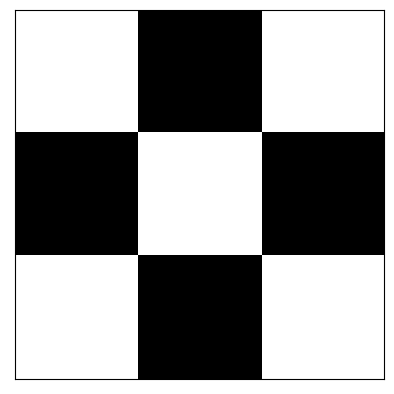

p= 3 n= 2 N=p^n= 9


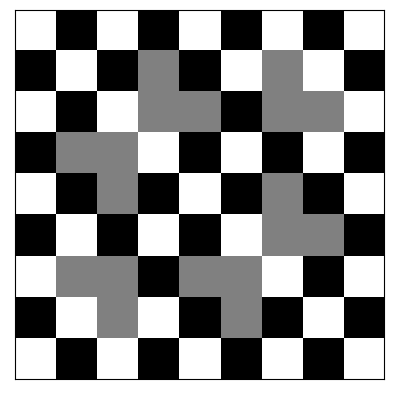

p= 3 n= 3 N=p^n= 27


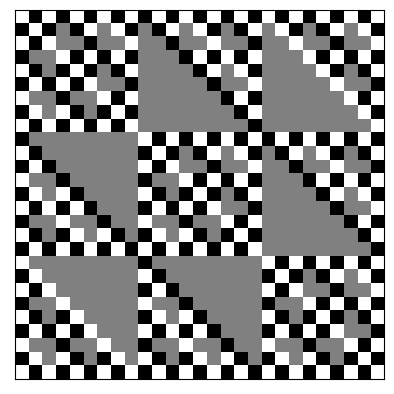

In [6]:
p=3
for n in range(1,4):
    print("p=",p,"n=",n,"N=p^n=",p**n)
    N=p**n
    D=DamierPn(p,n)
    S=damier_pascal_S(N)
    Dtheo=((S%p)!=0).astype('int')
    plt.figure()
    plt.imshow((D)*128,cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.xticks([])  
    plt.yticks([])  
    plt.show()
    

The use of the regularity of the Pascal tiling for $N=p$ with $p$ prime, together with the properties of the Pascal triangle modulo $p$, makes it possible to infer a geometrically recursive construction rule for the tiling of size $N$, modulo $p$ (and not modulo $N$). One obtains the exact number and positions of the cells of the $N \times N$ Pascal tiling that are not congruent to $0 \pmod{p}$ (and \emph{a fortiori} not congruent to $0 \pmod{p^n}$).

## Proof of $S^{p^n}_{i,j} \mod p$

The Pascal tiling $S^N_{i,j}$, for $0 \leq j \leq i \leq N-1$, is defined on the lower-left triangle by
$$
S^N_{i,j}=\binom{i}{j}+\binom{N-1-j}{N-1-i}.
$$

The upper-right triangle is constructed by symmetry, $S_{j,i}=S_{i,j}$.

We focus on the particular case $N=p^n$, with $p>2$, $n>1$, and $j \leq i$.

We use the decomposition of $i$ and $j$ in base $p$:
$$
\begin{eqnarray}
i&=&i_{n-1}p^{n-1}+i'=\sum_{k=0}^{n-1}i_kp^k\\
j&=&j_{n-1}p^{n-1}+j'=\sum_{k=0}^{n-1}j_kp^k
\end{eqnarray}
$$

First, note that the condition $j \leq i$ implies $j_{n-1} \leq i_{n-1}$.

We then obtain
$$
\begin{eqnarray}
S^{p^n}_{i,j}&=&\binom{i_{n-1}p^{n-1}+i'}{j_{n-1}p^{n-1}+j'}+\binom{p^n-1-j_{n-1}p^{n-1}-j'}{p^n-1-i_{n-1}p^{n-1}-i'}\\
&=&\binom{i_{n-1}p^{n-1}+i'}{j_{n-1}p^{n-1}+j'}+\binom{(p-1-j_{n-1})p^{n-1}+p^{n-2}-1-j'}{(p-i_{n-1})p^{n-1}+p^{n-2}-1-i'}
\end{eqnarray}
$$


This, by application of Lucas’ theorem, allows us to expand and simplify the expression of $S_{i,j}$ modulo $p$.

$$
\begin{eqnarray}
S^{p^n}_{i,j}&\equiv &\binom{i_{n-1}}{j_{n-1}}\binom{i'}{j'}+\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\binom{p^{n-2}-1-j'}{p^{n-2}-1-i'}\mod~p
\end{eqnarray}
$$

In the case where $j'>i'$, one has $\binom{i'}{j'}=\binom{p-1-j'}{p-1-i'}=0$.

In the geometric construction rule, this corresponds to the step where the large upper-right triangles of the Pascal tiling for $N=p^{n-1}$ are set to $1$.

In the case where $j_{n-1}\leq i_{n-1}$ (which is always true since $j\leq i$), one sees the terms
$$
\begin{eqnarray}
A^{N=p}_{i_{n-1},j_{n-1}}&=&\binom{i_{n-1}}{j_{n-1}}\\
B^{N=p}_{i_{n-1},j_{n-1}}&=&\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\\
\end{eqnarray}
$$

In the case where $j'\leq i'$ (the case of interest, since $j'>i'$ has already been discussed), one observes
$$
\begin{eqnarray}
A^{N=p^{n-1}}_{i',j'}&=&\binom{i'}{j'}\\
B^{N=p^{n-1}}_{i',j'}&=&\binom{p^{n-1}-1-j'}{p^{n-1}-1-i'}
\end{eqnarray}
$$

By adding the relation $S+W=2A$ and $S-W=2B$,

we obtain:
$$
\begin{eqnarray}
2S^{p^n}_{i,j}&\equiv &S^p_{i_{n-1},j_{n-1}}S^{p^{n-1}}_{i',j'}+W^p_{i_{n-1},j_{n-1}}W^{p^{n-1}}_{i',j'}\mod~p
\end{eqnarray}
$$

Since $p$ is prime and strictly greater than $2$, the Pascal tiling theorem implies that the tiling and its mirror are regular, and that one passes from one to the other by permuting the white cells and the black cells.

- First case: $i_{n-1}+j_{n-1}\equiv 0\mod~2$
- Second case: $i_{n-1}+j_{n-1}\equiv 1\mod~2$


### First Case : $i_{n-1}+j_{n-1}\equiv 0\mod~2$

Then $W^p_{i_{n-1},j_{n-1}}\equiv 0\mod~p$,  $S^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod~p$ which implies :

$$S^{p^n}_{i,j}\equiv S^{p^{n-1}}_{i',j'}\mod~p$$


### Second Case : $i_{n-1}+j_{n-1}\equiv 1\mod~2$

Then $S^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$,  $W^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$ which implies :

$$S^{p^n}_{i,j}\equiv W^{p^{n-1}}_{i',j'}\mod~p$$


## Proof of $W^{p^n}_{i,j} \mod p$

Here we generalize the previous proof to the mirror of the Pascal tiling.

The reasoning is the same.
$$
\begin{eqnarray}
W^{p^n}_{i,j}&\equiv &\binom{i_{n-1}}{j_{n-1}}\binom{i'}{j'}-\binom{p-1-j_{n-1}}{p-1-i_{n-1}}\binom{p^{n-2}-1-j'}{p^{n-2}-1-i'}\mod~p
\end{eqnarray}
$$

In the case where $j'>i'$, one has $\binom{i'}{j'}=\binom{p-1-j'}{p-1-i'}=0$, as before.


In the case where $j_{n-1}\leq i_{n-1}$ (which is always true since $j\leq i$), one obtains this time
$$
\begin{eqnarray}
2W^{p^n}_{i,j}&\equiv &2\left(A^p_{i_{n-1},j_{n-1}}A^{p^{n-1}}_{i',j'}-B^p_{i_{n-1},j_{n-1}}B^{p^{n-1}}_{i',j'}\right)\mod~p\\
&\equiv&{1\over 2}\left(S^p_{i_{n-1},j_{n-1}}+W^p_{i_{n-1},j_{n-1}}\right)\left(S^{p^{n-1}}_{i',j'}+W^{p^{n-1}}_{i',j'}\right)-{1\over 2}\left(S^p_{i_{n-1},j_{n-1}}-W^p_{i_{n-1},j_{n-1}}\right)\left(S^{p^{n-1}}_{i',j'}-W^{p^{n-1}}_{i',j'}\right)\mod~p\\
&\equiv &S^p_{i_{n-1},j_{n-1}}W^{p^{n-1}}_{i',j'}+W^p_{i_{n-1},j_{n-1}}S^{p^{n-1}}_{i',j'}\mod~p
\end{eqnarray}
$$



### First Case : $i_{n-1}+j_{n-1}\equiv 0\mod~2$

Then $W^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$, $S^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$ which implies :

$$W^{p^n}_{i,j}\equiv W^{p^{n-1}}_{i',j'}\mod p$$


### Second Case : $i_{n-1}+j_{n-1}\equiv 1\mod~2$

Then $S^p_{i_{n-1},j_{n-1}}\equiv 0\mod p$, $W^p_{i_{n-1},j_{n-1}}\not\equiv 0\mod p$ which implies :

$$W^{p^n}_{i,j}\equiv S^{p^{n-1}}_{i',j'}\mod p$$


## Conclusion

We have thus established the recursive construction rule for $S^{p^n}_{i,j} \mod p$, when $p$ is a prime number strictly greater than $2$, starting from $S^{p^{n-1}}_{i,j} \mod p$, and from the base-$p$ decompositions of $i=i_{n-1}p^{n-1}+i'$ and $j=j_{n-1}p^{n-1}+j'$, by distinguishing the following cases:
- $j\leq i$
    - $j'>i \Rightarrow S^{p^n}_{j,i}\equiv0 \mod p$
    - $j'\leq i'$
        - $i_{n-1}+j_{n-1}\equiv 0\mod 2 \Rightarrow S^{p^n}_{j,i}\equiv S^{p^{n-1}}_{i',j'} \mod p$ 
        - $i_{n-1}+j_{n-1}\equiv 1\mod 2 \Rightarrow S^{p^n}_{j,i}\equiv W^{p^{n-1}}_{i',j'} \mod p$ 
- $j>i \Rightarrow S^{p^n}_{j,i}\equiv S^{p^n}_{i,j} \mod p$

In an immediate way, this property makes it possible:
- to determine all the cells of the Pascal tiling for $N=p^n$ that are congruent or not to $0$ modulo $p$, as well as those that are not. One may for instance deduce a subset of cells for which it is guaranteed that $S^N_{i,j}\not\equiv 0\mod p^n$.
- to prove the known property according to which $L_{p^n}-1\equiv 0\mod p$, which, as in the proof of $L_p-1\equiv 0\mod p$, takes the form of a term-by-term equality in the tiling.

The proof for $W^{p^n}_{i,j}\mod p$ shows that the mirror principle also applies to $W^{p^n}_{i,j}$ for the cells $(i,j)$ whose divisibility is determined by the tiling or its mirror, but not for those cells for which $j'>i'$.
